# Лабораторная работа №11. Модуляция и выборка (квантование)
## Жилкина Лада, 5130901/10202

In [8]:
import numpy as np
import sys
sys.path.append('../')
from thinkdsp import Wave, read_wave

## Упражнение 11.3
При взятии выборок из сигнала при слишком низкой частоте кадров составляющие, большие частоты заворота дадут биение. В таком случае эти компоненты не отфильтруешь, поскольку они неотличимы от более низкий частот.

Полезно отфильтровать эти частоты до выборки; фильтр НЧ, испоьзуемый для этой цели, называется фильтр сглаживания.

Вернемся к примеру "Соло на барабане", применим фильтр НЧ до выборки, а затем, опять же с помощью фильтра НЧ, удалим спектральные копии, вызванные выборкой. Результат должен быть идентичен отфильтрованному сигналу.

Послушаем исследуемый пример:

In [9]:
wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.make_audio()

Распечатаем его:

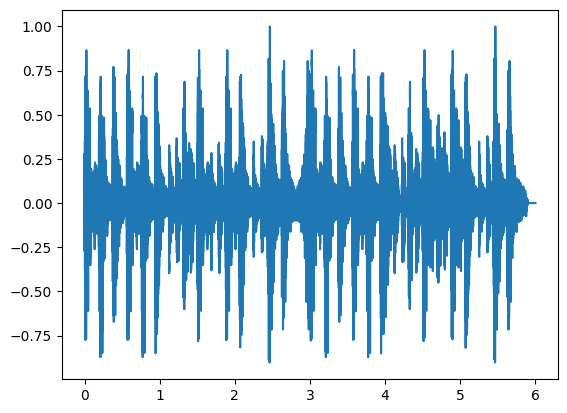

In [10]:
wave.normalize()
wave.plot()

Распечатаем спектр:

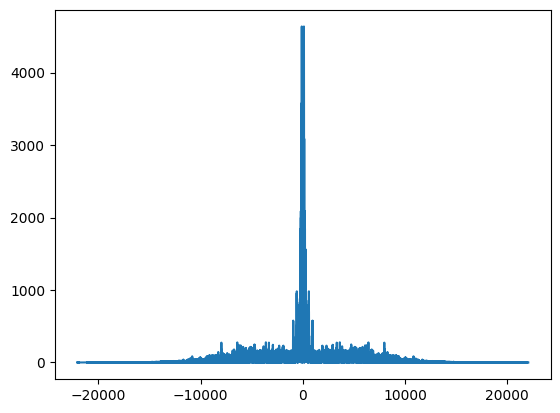

In [11]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Сократим скорость дискретизации в 5 раз. Перед тем, как проводить выборку сигнала, используем фильтр для устранения высокочастотных компонентов, которые превышают новую максимальную частоту сигнала, находящуюся в центре кадра:

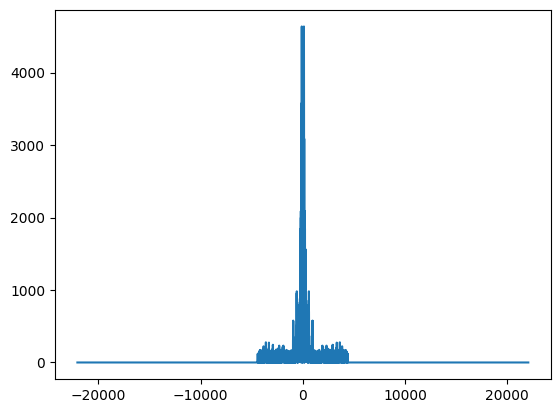

In [15]:
factor = 5
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1
spectrum.low_pass(cutoff)
spectrum.plot()

Послушаем:

In [16]:
filtered = spectrum.make_wave()
filtered.make_audio()

Высокочастотные компоненты сигнала практически неразличимы на слух.

Напишем функцию, которая моделирует процесс отбора отсчетов сигнала:

In [17]:
def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate) 

Применим функцию к сигналу и послушаем результат:

In [18]:
sampled = sample(filtered, factor)
sampled.make_audio()

Распечатаем спектр:

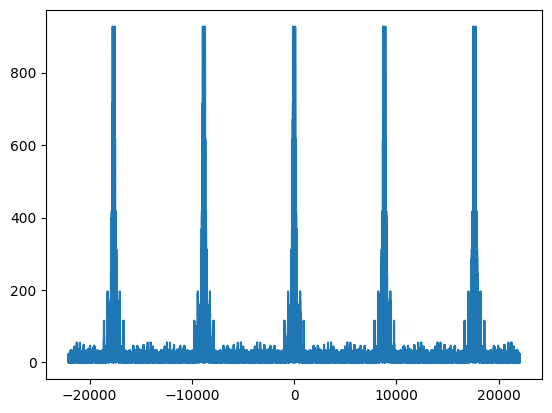

In [19]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

На спектре присутствует множество спектральных копий. Устраним их с помощью фильтра низких частот и сравним результат с отфильтрованным сигналом:

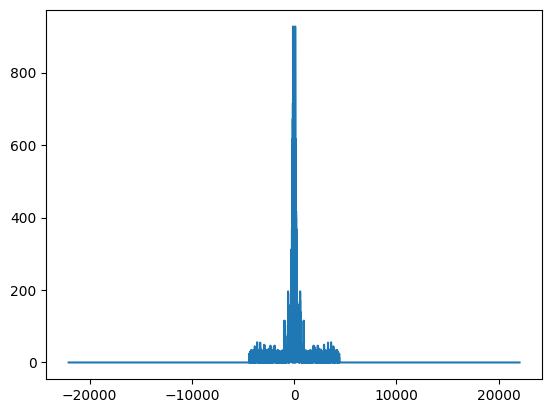

In [20]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

Вернем исходную энергию спектра сигнала:

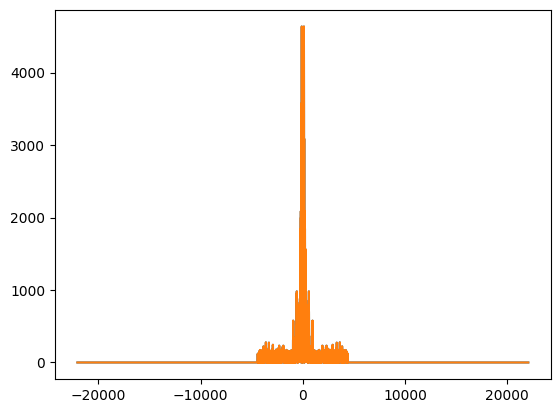

In [21]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Определим разность между спектром сигнала до и после процесса выборки:

In [22]:
spectrum.max_diff(sampled_spectrum)

1.3642420526593924e-12

Разница между исходным сигналом и сигналом после выборки минимальна.